# `gaslight` documentation

`gaslight` is a package for accessing and analysing grids of photoionisation models created as part of the wider **gaslight** project.

`gaslight` provides methods to access specific grid points, interpolate the grids, flatten the grids to explore large collections of models, and calculate other quantities such as equivalent widths and spectra. `gaslight` complements the much more comprehensive [`synthesizer`](https://github.com/flaresimulations/synthesizer) synthetic observations pipeline and utilises various methods and functions from that package. 

`gaslight` also makes extensive use of the [`unyt`]() package. 


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from gaslight.grid import Grid
from synthesizer import line_ratios

## Open a grid and get basic information

In [2]:
grid_dir = '/Users/sw376/Dropbox/Research/data/gaslight/grids'
grid_name = 'qsosed-isotropic-limited-agn-c23.01-reduced-v1' # WORKS
# grid_name = 'qsosed-isotropic-limited-agn-c23.01-v1' # DOES NOT WORK
# grid_name = 'bpl-feltre16-agn-c23.01-v1' # EWs wrong
# grid_name = 'bpl-feltre16-agn-c23.01-reduced-v1' # EWs wrong

g = Grid(grid_dir=grid_dir, grid_name=grid_name)

print(g)

------------------------------
SUMMARY OF GASLIGHT GRID
Grid dimensions: 
  Numer of axes: 6
  Grid shape: (5, 4, 7, 3, 6, 3)
  Numer of models: 7560
  Numer of failed models: 20 (0.26%)
Grid axes: 
  mass: [1.e+06 1.e+07 1.e+08 1.e+09 1.e+10] 
  accretion_rate_eddington: [0.03162278 0.1        0.31622777 1.        ] 
  metallicity: [0.0001 0.0003 0.001  0.003  0.01   0.03   0.05  ] 
  ionisation_parameter: [1.e-04 1.e-02 1.e+00] 
  hydrogen_density: [1.e+02 1.e+04 1.e+06 1.e+08 1.e+10 1.e+12] 
  stop_column_density: [21. 23. 25.] 
------------------------------



In [3]:
# g.lines

## Identifying the nearest grid point

In [4]:
# get the first grid point
point = {axis: g.axes_values[axis][0] for axis in g.axes}
print(point)

# get a random grid point
point = {axis: g.axes_values[axis][np.random.randint(len(g.axes_values[axis]))] for axis in g.axes}
print(point)

# get the grid point as a tuple
grid_point = g.get_nearest_grid_point(point)
print(grid_point)



{'mass': np.float64(999999.9999999999), 'accretion_rate_eddington': np.float64(0.03162277660168379), 'metallicity': np.float64(0.0001), 'ionisation_parameter': np.float64(0.0001), 'hydrogen_density': np.float64(100.0), 'stop_column_density': np.float64(21.0)}
{'mass': np.float64(99999999.99999999), 'accretion_rate_eddington': np.float64(0.03162277660168379), 'metallicity': np.float64(0.0001), 'ionisation_parameter': np.float64(0.01), 'hydrogen_density': np.float64(10000.0), 'stop_column_density': np.float64(21.0)}
(np.int64(2), np.int64(0), np.int64(0), np.int64(1), np.int64(1), np.int64(0))


## Obtain a line luminosity at a particular grid point

In [5]:

# line ID using the cloudy notation
line_id = 'H 1 4861.32A'

# provide a grid_point tuple
line = g.get_line_at_grid_point(grid_point, line_id)
print(line)

# this also works if you provide the method the dictionary 
line = g.get_line_at_grid_point(point, line_id)
print(line)


----------
SUMMARY OF H 1 4861.32A
wavelength: 4861.3 Å
Npart: 1
<log10(luminosity/erg/s)>: -3.22
<equivalent width>: 27 Å
----------
----------
SUMMARY OF H 1 4861.32A
wavelength: 4861.3 Å
Npart: 1
<log10(luminosity/erg/s)>: -3.22
<equivalent width>: 27 Å
----------


Properties can be easily accessed e.g.

In [6]:
print(line.luminosity)
print(line.equivalent_width)

0.0006032167416098828 erg/s
26.824228259928567 Å


We can also set the the `covering_fraction`, which will change the luminosities and equivalent widths.

In [7]:
# this also works if you provide the method the dictionary 
line = g.get_line_at_grid_point(point, line_id, covering_fraction = 0.5)
print(line)

----------
SUMMARY OF H 1 4861.32A
wavelength: 4861.3 Å
Npart: 1
<log10(luminosity/erg/s)>: -3.52
<equivalent width>: 14 Å
----------


## Create a LineCollection at a particular grid point

We can also create a synthesizer LineCollection object by specifying a set of lines, or leaving the option blank to produce a collection of all available lines.

In [8]:

line_ids = [
    'H 1 4861.32A', 
    'O 3 4958.91A', 
    'O 3 5006.84A', 
    'H 1 6562.80A', 
    'N 2 6583.45A', 
    'Ni 2 6666.80A'
    ]
lines = g.get_line_collection_at_grid_point(grid_point, line_ids=line_ids)
print(lines)

----------
LINE COLLECTION
number of lines: 6
lines: ['H 1 4861.32A' 'O 3 4958.91A' 'O 3 5006.84A' 'H 1 6562.80A'
 'N 2 6583.45A' 'Ni 2 6666.80A']
available ratios: ['BalmerDecrement', 'N2', 'R3']
available diagrams: ['BPT-NII']
----------


### Line ratios and diagrams

The LineRatio object makes it easy to extract a line ratio or line diagnostic (pair of ratios).

In [9]:
lines.get_ratio('R3')

np.float64(0.42721582608462555)

In [10]:
lines.get_diagram('BPT-NII')

(np.float64(1.8457637096409e-05), np.float64(0.42721582608462555))

## Get LineCollection for the entire grid

We can also generate a LineCollection containing the entire grid (preserving its original shape). 

In [11]:
line_ids = [
    'H 1 4861.32A', 
    'O 3 4958.91A', 
    'O 3 5006.84A', 
    'H 1 6562.80A', 
    'N 2 6583.45A', 
    'Ni 2 6666.80A'
    ]
lines = g.get_line_collection(line_ids=line_ids)
print(lines)

----------
LINE COLLECTION
number of lines: 6
lines: ['H 1 4861.32A' 'O 3 4958.91A' 'O 3 5006.84A' 'H 1 6562.80A'
 'N 2 6583.45A' 'Ni 2 6666.80A']
available ratios: ['BalmerDecrement', 'N2', 'R3']
available diagrams: ['BPT-NII']
----------


We can show that the shape of the luminosity entry is correct:

In [12]:
print(lines['H 1 6562.80A'].luminosity.shape)

(5, 4, 7, 3, 6, 3)


This can be made more usable by simply flattening the array. For example,

In [13]:
lines.get_ratio('R3').flatten().shape

(7560,)

## Flatten a grid for analysis

The `gaslight` grid also contains a flattened version of the `axes_values`, i.e. `axes_values_flattened` which can be used to easily slice the data.

In [14]:
selection = g.axes_values_flattened['metallicity'] > 0.01
print(np.sum(selection))

2160


### luminosities (bolometric corrections for AGN)

Plot the distribution of H $\alpha$ luminosities. For AGN grids this is equivalent to the bolometric correction.

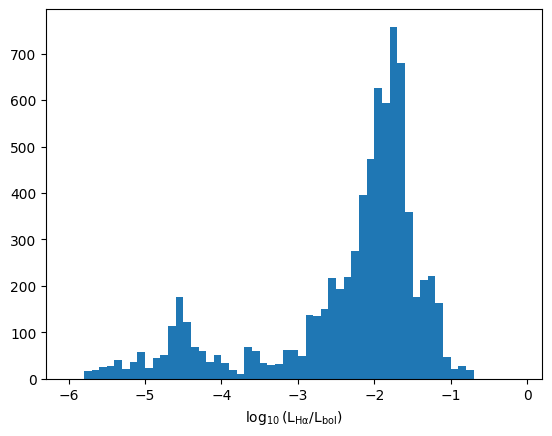

In [15]:
bins = np.arange(-6., 0.0, 0.1)
plt.hist(np.log10(lines['H 1 6562.80A'].luminosity.flatten().to('erg/s').value), bins = bins)
plt.xlabel(r'$\rm \log_{10}(L_{H\alpha}/L_{bol})$')
plt.show()

### Equivalent widths

The `synthesizer` Line objects also store the equivalent widths.

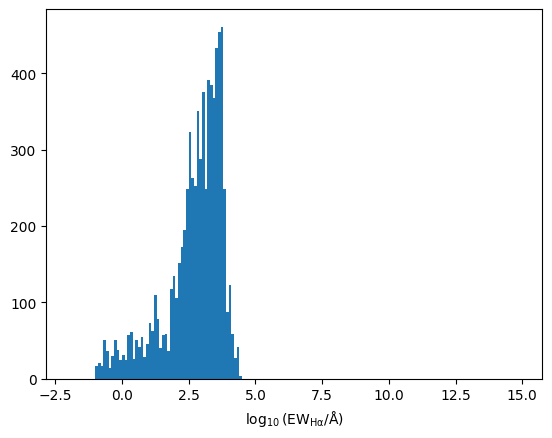

In [16]:
bins = np.arange(-2., 15., 0.1)
plt.hist(np.log10(lines['H 1 6562.80A'].equivalent_width.flatten().to('Angstrom').value), bins = bins)
plt.xlabel(r'$\rm \log_{10}(EW_{H\alpha}/\AA)$')
plt.show()

### Balmer Decrement

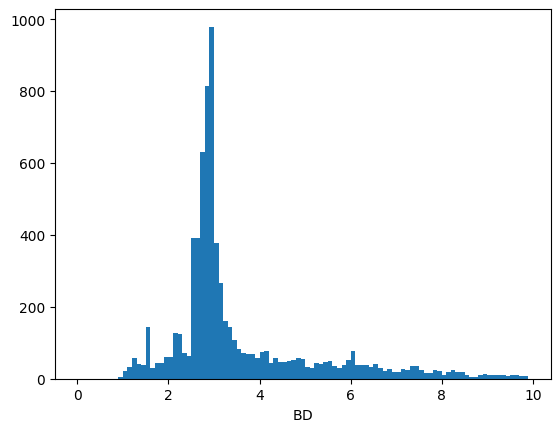

In [17]:
ratio = lines.get_ratio('BalmerDecrement').flatten()

selection = np.ones(len(ratio), dtype='bool')
# selection = (g.axes_values_flattened['hydrogen_density'] < 10**4) & (g.axes_values_flattened['stop_column_density'] < 23.0)
# selection = (g.axes_values_flattened['hydrogen_density'] < 10**4) & (g.axes_values_flattened['metallicity'] < 0.01)

bins = np.arange(0., 10., 0.1)
plt.hist(ratio[selection], bins = bins)
plt.xlabel(r'$\rm BD$')
plt.show()

## Example library

`gaslight` is provided with a small collection of exxamples.

## Tool library

`gaslight` comes with a suite of interactive for exploring grids. 